### Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### FX Market

In [2]:
fx = pd.read_excel('USD.xlsx').set_index('Date')
fxM = fx.resample('MS').mean()
fxM['Spread'] = ((fxM.MEP/fxM.A3500)-1)*100
fxM.head()

,MEP,A3500,Spread
Date,,,
2019-01-01,37.507182,37.406891,0.268108
2019-02-01,38.501590,38.408550,0.242238
2019-03-01,41.646526,41.362374,0.686983
2019-04-01,43.464116,43.233768,0.532795
2019-05-01,44.827022,44.893087,-0.147161


### Plotting the gap

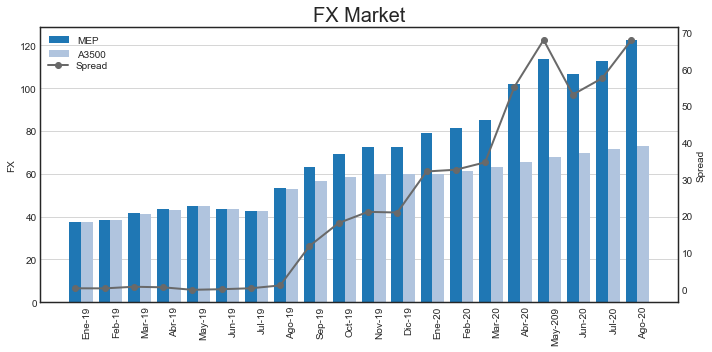

In [3]:
plt.style.use('seaborn-white')

x = np.arange(len(fxM))
y0 = fxM.iloc[:,0].values
y1 = fxM.iloc[:,1].values
y2 = fxM.iloc[:,2].values
width = 0.4

fig,ax = plt.subplots(figsize=(10,5))
ax.bar(x,y0,width)
ax.bar(x+width,y1,width,color='lightsteelblue')
ax.set_xticks(x + width)
ax.set_xticklabels(['Ene-19','Feb-19','Mar-19','Abr-19','May-19','Jun-19',
                    'Jul-19','Ago-19','Sep-19','Oct-19','Nov-19','Dic-19',
                    'Ene-20','Feb-20','Mar-20','Abr-20','May-209','Jun-20',
                    'Jul-20','Ago-20'], rotation=90)
ax.set_ylabel('FX')
ax.set_title('FX Market',fontsize=20)
ax.grid(axis='y')
ax.legend(['MEP','A3500'])

ax1 = ax.twinx()  
ax1.plot(y2,lw=2,c="dimgray",marker='o')
ax1.set_ylabel('Spread')  
ax1.legend(['Spread'],bbox_to_anchor=(0.12, 0.91))

fig.tight_layout()

### Rates Market

In [4]:
badlar = pd.read_excel('Badlar.xlsx').set_index('Date').resample('M').mean()
leliq  = pd.read_excel('Leliq.xlsx').set_index('Date').resample('M').mean()

rates = pd.concat([badlar,leliq],axis=1)
rates['Spread'] = rates.Leliq - rates.Badlar
rates.head()

,Badlar,Leliq,Spread
Date,,,
2019-01-31,45.812500,57.433636,11.621136
2019-02-28,37.584375,47.569000,9.984625
2019-03-31,41.674342,62.428947,20.754605
2019-04-30,48.707237,68.455789,19.748553
2019-05-31,52.588068,71.787273,19.199205


### Plotting the gap

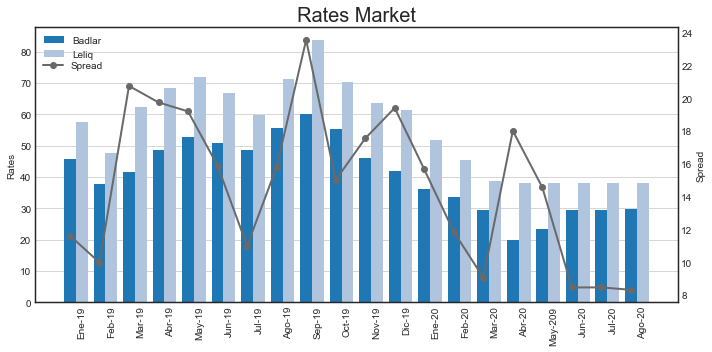

In [5]:
plt.style.use('seaborn-white')

x = np.arange(len(rates))
y0 = rates.iloc[:,0].values
y1 = rates.iloc[:,1].values
y2 = rates.iloc[:,2].values
width = 0.4

fig,ax = plt.subplots(figsize=(10,5))
ax.bar(x,y0,width)
ax.bar(x+width,y1,width,color='lightsteelblue')
ax.set_xticks(x + width)
ax.set_xticklabels(['Ene-19','Feb-19','Mar-19','Abr-19','May-19','Jun-19',
                    'Jul-19','Ago-19','Sep-19','Oct-19','Nov-19','Dic-19',
                    'Ene-20','Feb-20','Mar-20','Abr-20','May-209','Jun-20',
                    'Jul-20','Ago-20'], rotation=90)
ax.set_ylabel('Rates')
ax.set_title('Rates Market',fontsize=20)
ax.grid(axis='y')
ax.legend(['Badlar','Leliq'],loc='upper left')

ax1 = ax.twinx()  
ax1.plot(y2,lw=2,c="dimgray",marker='o')
ax1.set_ylabel('Spread')  
ax1.legend(['Spread'],bbox_to_anchor=(0.12, 0.91))

fig.tight_layout()

### Plotting the lines

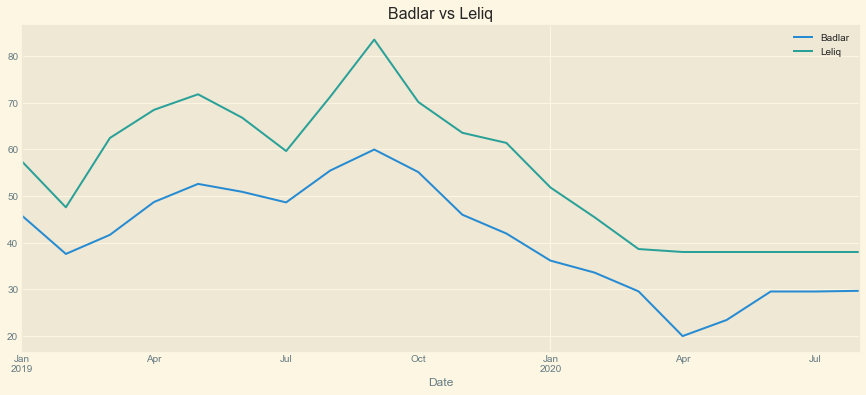

In [6]:
with plt.style.context('Solarize_Light2'):
    plt.rcParams['figure.figsize'] = [15, 6]
    rates.iloc[:,:2].plot()
    plt.title('Badlar vs Leliq')
plt.show()

### Monetary Base

In [7]:
base = pd.read_excel('BM.xlsx').set_index('Date').resample('M').mean()
base['Cambio i.a'] = base.Base_Monetaria.pct_change(12)
base = base.dropna(axis=0)
base.head()

,Base_Monetaria,Cambio i.a
Date,,
2016-01-31,601463.150000,0.327700
2016-02-29,563841.210526,0.252060
2016-03-31,584929.047619,0.290670
2016-04-30,582016.619048,0.275070
2016-05-31,585480.238095,0.249496


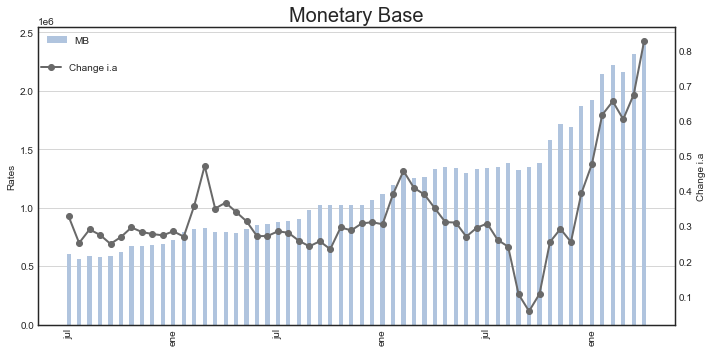

In [8]:
plt.style.use('seaborn-white')

x = np.arange(len(base))
y0 = base.iloc[:,0].values
y1 = base.iloc[:,1].values

width = 0.4

fig,ax = plt.subplots(figsize=(10,5))
ax.bar(x,y0,width,color='lightsteelblue')

ax.set_xticklabels(['ene','jul','ene','jul','ene','jul',
                   'ene','jul','ene','jul','ene','jul'], rotation=90)

ax.set_ylabel('Rates')
ax.set_title('Monetary Base',fontsize=20)
ax.grid(axis='y')
ax.legend(['MB'],loc='upper left')

ax1 = ax.twinx()  
ax1.plot(y1,lw=2,c="dimgray",marker='o')
ax1.set_ylabel('Change i.a')  
ax1.legend(['Change i.a'],bbox_to_anchor=(0.14, 0.91))

fig.tight_layout()